# **`Análisis y Predicción del Riesgo de Ataques Cardíacos en India con Machine Learning`**

**Objetivo del Proyecto:** Este proyecto busca predecir el riesgo de ataque cardíaco a partir de variables clínicas y demográficas. Utilizaremos algoritmos de Machine Learning supervisado para resolver un problema de clasificación binaria.

## **Montar Google Drive en Colab y importar librerias**

In [ ]:
# Instalar librerías necesarias
from google.colab import drive
!pip install pandas==2.2.2 --quiet
!pip install --upgrade gspread --quiet
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  (classification_report, accuracy_score, confusion_matrix,
                             roc_auc_score, roc_curve, precision_score,
                             recall_score, f1_score)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from IPython.display import display
import joblib

# Montar Google Drive
drive.mount('/content/drive')

# Cargar dataset desde Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1NM3fGIVkABvM7Odt52DS9RFy7u6rwi10Vtrln3Y4nes/export?format=csv"
df = pd.read_csv(sheet_url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Exploración de datos**

In [ ]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas:")
df.head()

Primeras filas:


,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [ ]:
# Imprime la info del DataSet
print("\nInfo del dataset:")
df.head()


Info del dataset:


,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [ ]:
# Imprime los valores nulos de las columnas
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64


# **Limpieza y exploración de datos**

In [ ]:
#Visualización de los nombres de las  columnas para ver si son cual de las columnas no es relevantes:
print("\n Limpieza de Columnas:")
print(df.columns)

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Reemplazar valores 0 en 'Triglyceride_Level' por NaN
df['Triglyceride_Level'].replace(0, np.nan, inplace=True)

# Imputar valores faltantes numericos con la media SOLO en columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())



 Limpieza de Columnas:
Index(['Patient_ID', 'State_Name', 'Age', 'Gender', 'Diabetes', 'Hypertension',
       'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity',
       'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
       'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure',
       'Family_History', 'Stress_Level', 'Healthcare_Access',
       'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income',
       'Health_Insurance', 'Heart_Attack_Risk'],
      dtype='object')


<ipython-input-35-1ddcf41f8289>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Triglyceride_Level'].replace(0, np.nan, inplace=True)


# **Featura Engineering**

In [ ]:
# Crear categorías de edad
bins = [18, 30, 45, 60, 75, 90]
labels = ["18-30", "31-45", "46-60", "61-75", "76-90"]
df["Age_Category"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Crear variable de riesgo cardiovascular
df['Heart_Risk'] = ((df['Cholesterol_Level'] > 200) | (df['Systolic_BP'] > 140) | (df['Diastolic_BP'] > 90)).astype(int)

# Estadísticas descriptivas
df.describe()

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk,Heart_Risk
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.00000
mean,5000.50000,49.394900,0.092900,0.24690,0.303700,0.301400,0.352800,0.595800,5.021700,224.753000,...,0.403600,0.311300,5.518800,0.311000,0.152500,206.383400,1.022062e+06,0.344700,0.300700,0.89750
std,2886.89568,17.280301,0.290307,0.43123,0.459878,0.458889,0.477865,0.490761,3.156394,43.359172,...,0.490644,0.463048,2.866264,0.462926,0.359523,112.391711,5.605978e+05,0.475294,0.458585,0.30332
min,1.00000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.035300e+04,0.000000,0.000000,0.00000
25%,2500.75000,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,187.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,110.000000,5.357838e+05,0.000000,0.000000,1.00000
50%,5000.50000,49.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,226.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,206.000000,1.021383e+06,0.000000,0.000000,1.00000
75%,7500.25000,64.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,8.000000,262.000000,...,1.000000,1.000000,8.000000,1.000000,0.000000,304.000000,1.501670e+06,1.000000,1.000000,1.00000
max,10000.00000,79.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,299.000000,...,1.000000,1.000000,10.000000,1.000000,1.000000,399.000000,1.999714e+06,1.000000,1.000000,1.00000


# **Análisis Exploratorio de Datos (EDA):**

**Matriz de correlación a partir de los datos numéricos de un DataFrame**

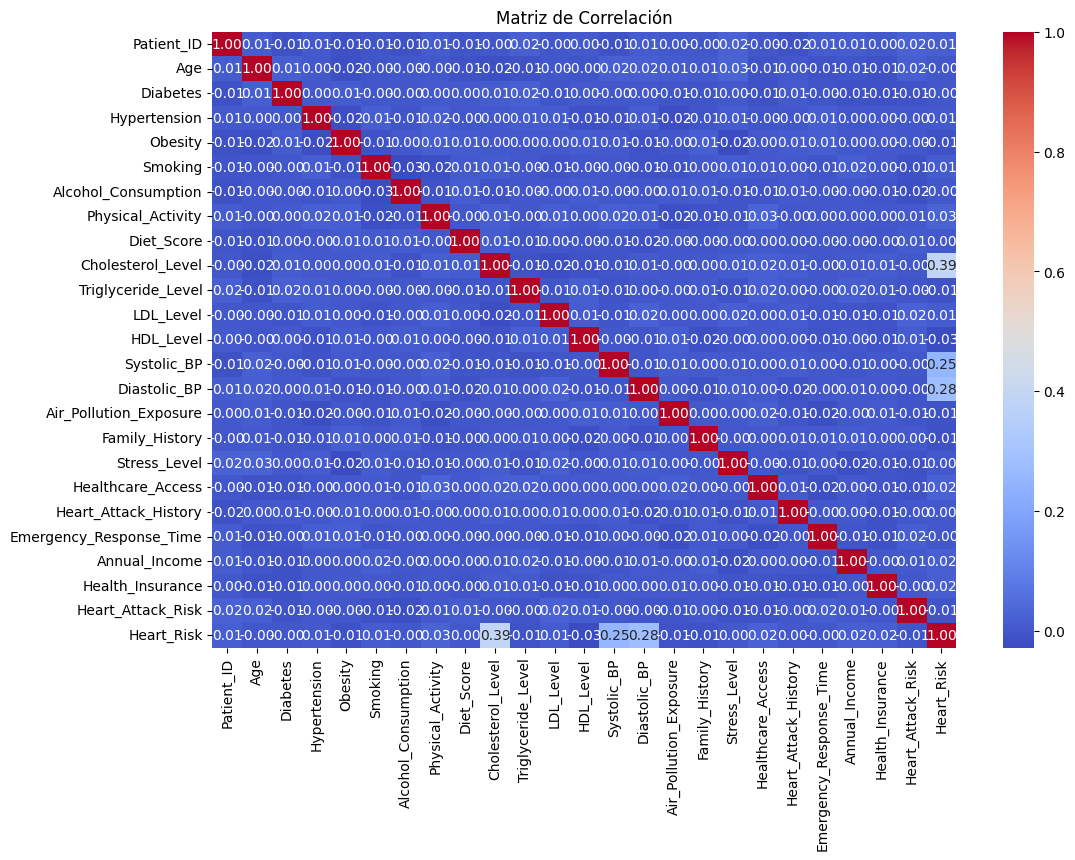

Imagen guardada: imagenes/matriz_correlacion.png


In [ ]:
# Creo la carpeta para guardar imágenes
output_folder = "imagenes"
os.makedirs(output_folder, exist_ok=True)

# Matriz de correlación
image_path = os.path.join(output_folder, "matriz_correlacion.png")
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.savefig(image_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Imagen guardada: {image_path}")

**Hstograma: Muestra la distribución de las edades**

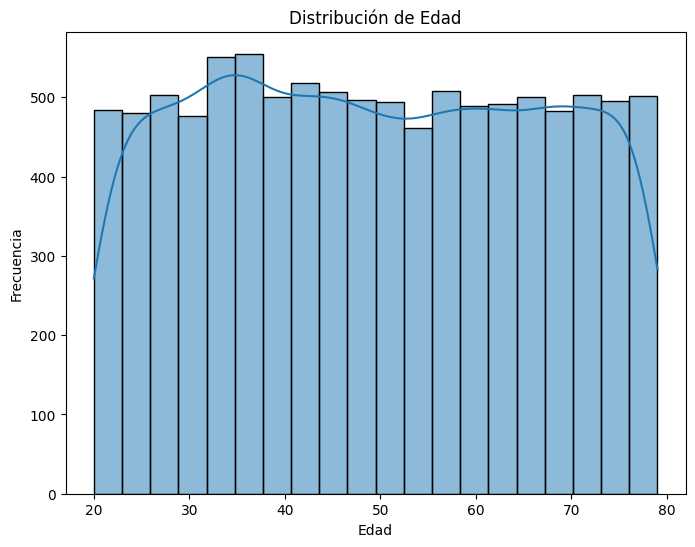

In [ ]:
# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Histograma_edad.png")

# Histograma de edad
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Mostrar la imagen
plt.show()

<ipython-input-40-8521a6d63bc9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Category', y='Cholesterol_Level', data=df, width=0.6, linewidth=2.5, palette="coolwarm")


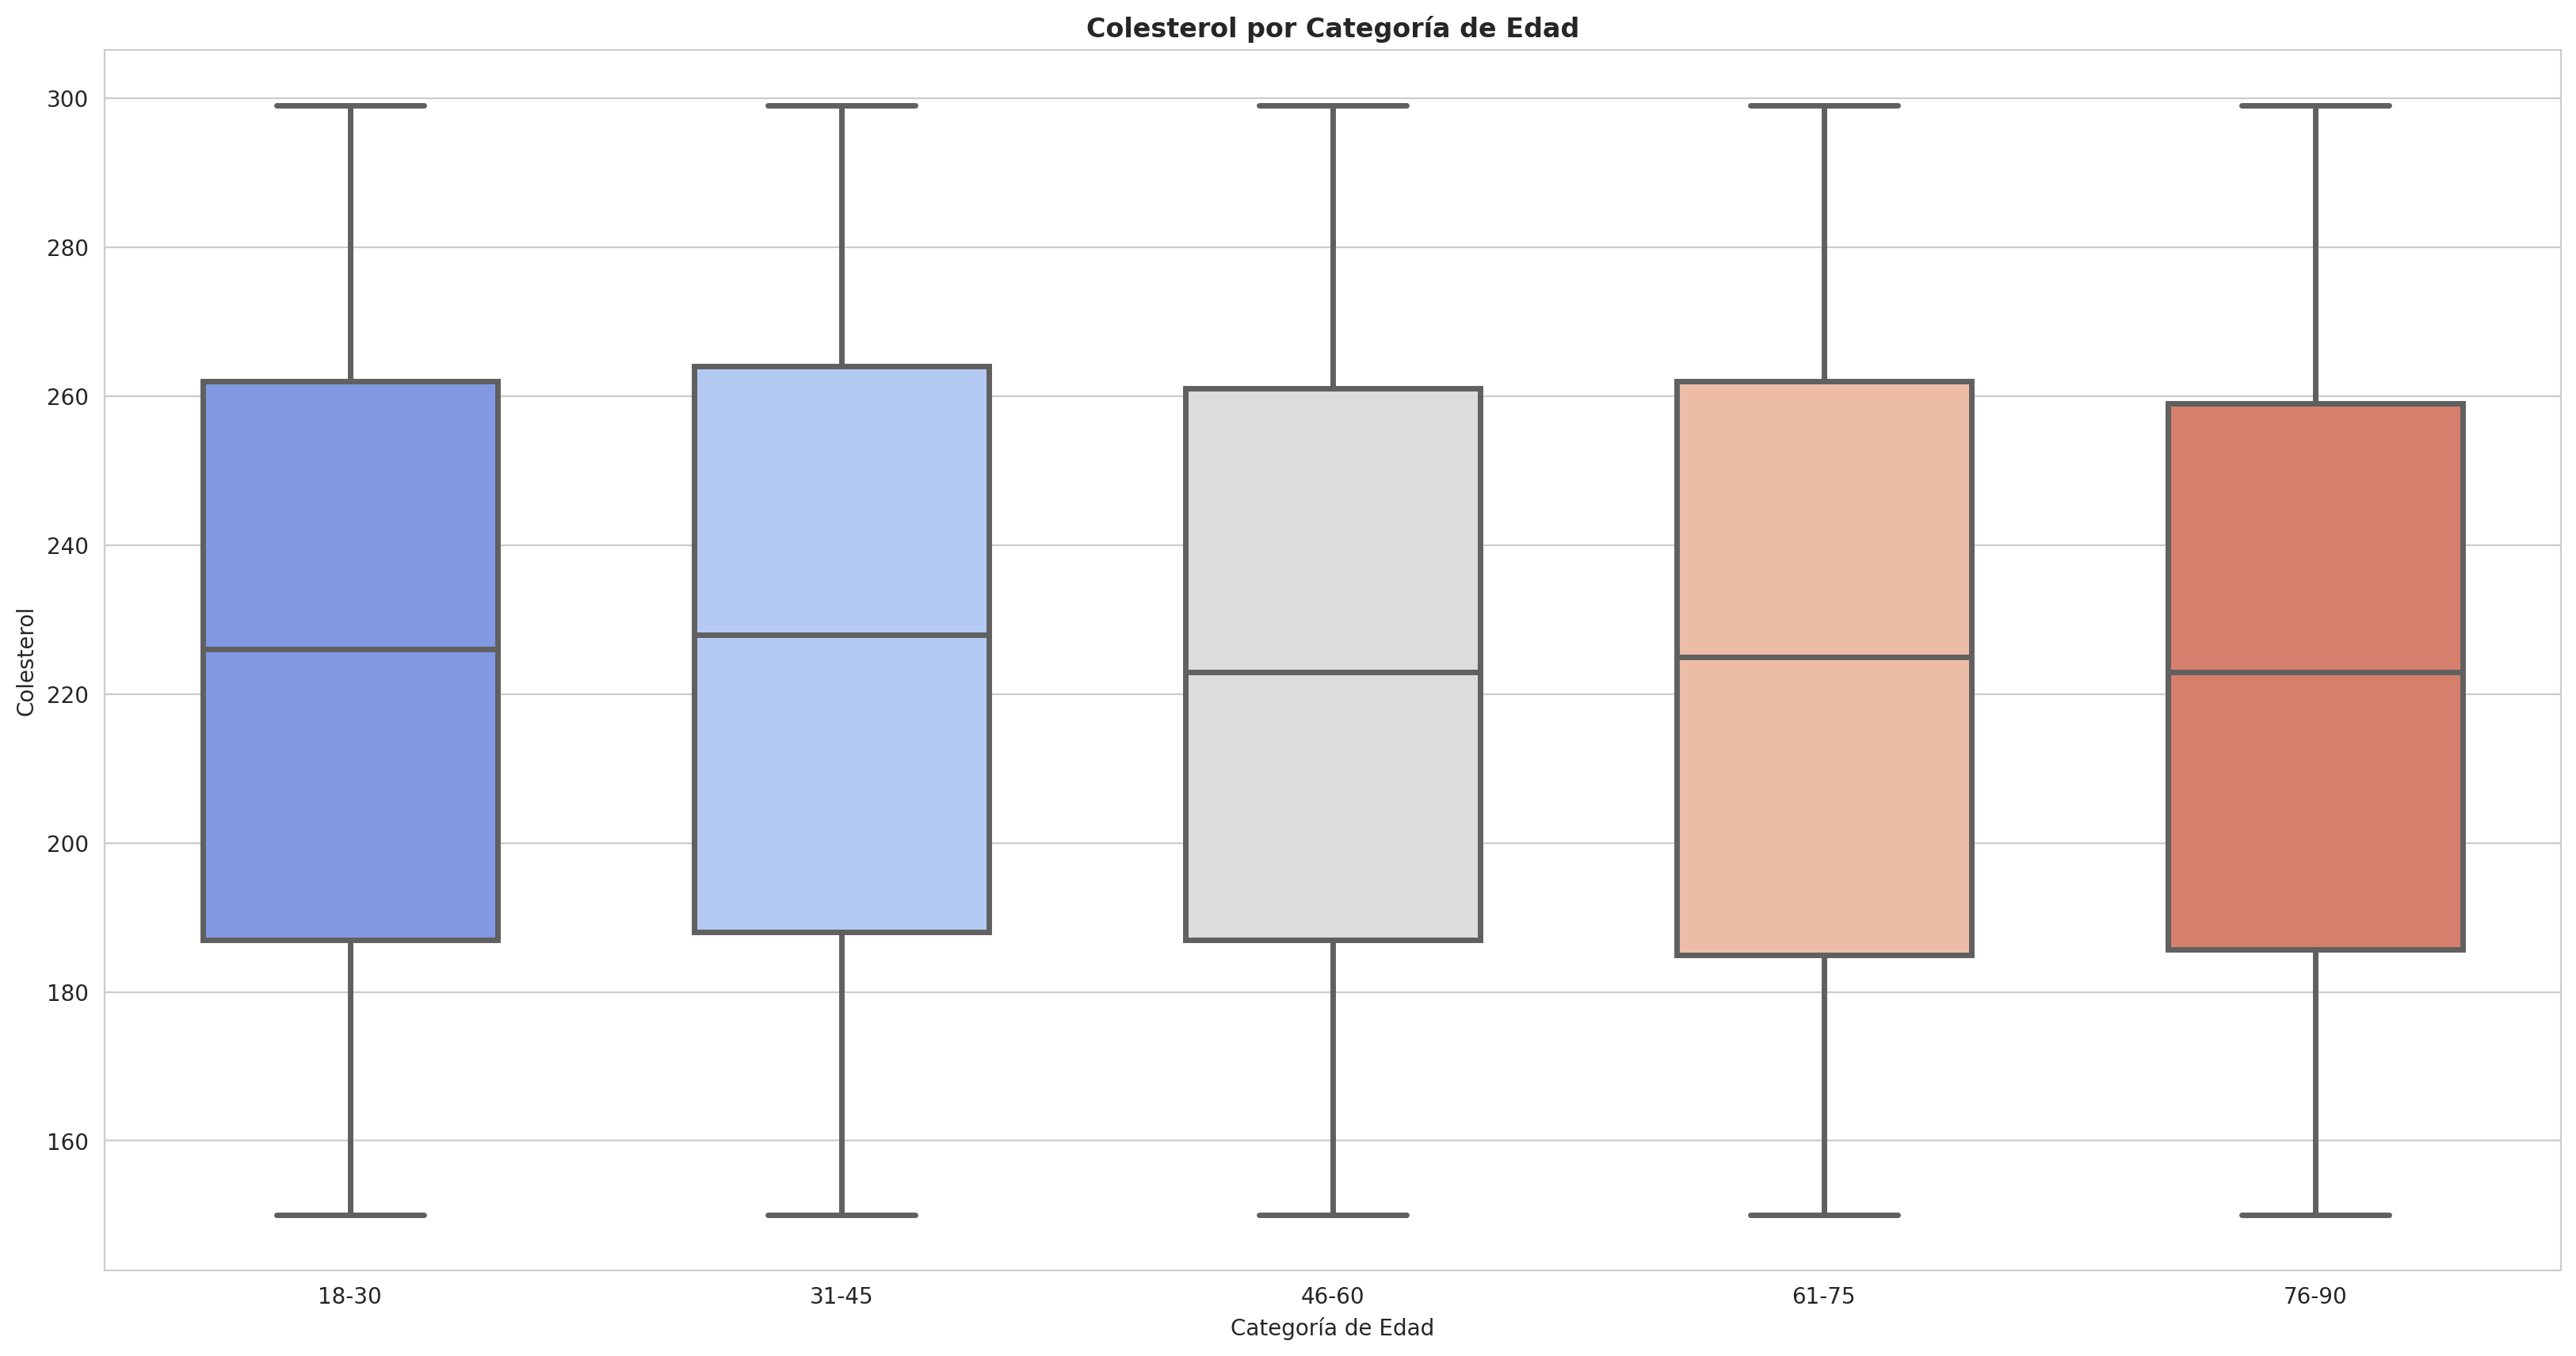

In [ ]:
# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Boxplot_de_colesterol_por_categoría_de_edad.png")

#Agrupar edades en rangos para evitar demasiadas categorías
bins = [18, 30, 45, 60, 75, 90]  # Definir los rangos de edad
labels = ["18-30", "31-45", "46-60", "61-75", "76-90"]
df["Age_Category"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Configuración del estilo
sns.set_style("whitegrid")

# Crear la figura con mayor tamaño y calidad
plt.figure(figsize=(20, 10), dpi=200)

#Boxplot con categorías de edad en vez de edad numérica
sns.boxplot(x='Age_Category', y='Cholesterol_Level', data=df, width=0.6, linewidth=2.5, palette="coolwarm")

# Etiquetas y título
plt.title('Colesterol por Categoría de Edad', fontsize=12, fontweight='bold')
plt.xlabel('Categoría de Edad', fontsize=10)
plt.ylabel('Colesterol', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Guardar la imagen con alta calidad
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Mostrar la imagen
plt.show()

**Gráfico de dispersión: Muestra la relación entre la edad y el nivel de colesterol, coloreado por el riesgo de ataque cardíaco.**

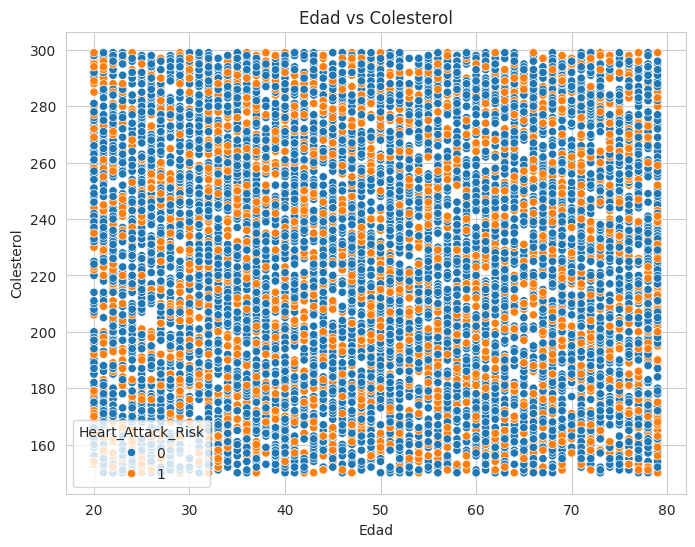

In [ ]:
# Verificar si la variable `output_folder` está definida
if 'output_folder' not in globals():
    output_folder = "imagenes"
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta si no existe

# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Scatterplot_edad_vs_Colesterol.png")

# Scatterplot Edad vs Colesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Cholesterol_Level', hue='Heart_Attack_Risk', data=df)
plt.title('Edad vs Colesterol')
plt.xlabel('Edad')
plt.ylabel('Colesterol')

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Mostrar imagen
plt.show()

**Correlaciòn:** Este mapa de calor, muestra la correlación entre la edad y el nivel de colesterol.

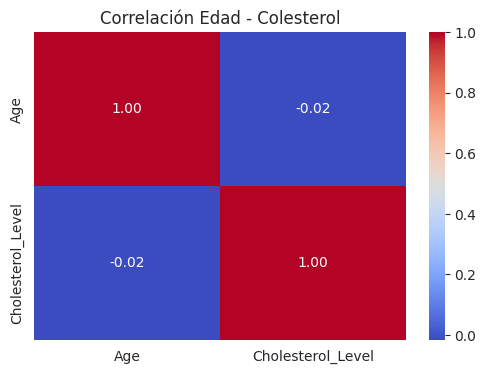

In [ ]:
# Verificar si la variable `output_folder` está definida
if 'output_folder' not in globals():
    output_folder = "imagenes"
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta si no existe

# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Mapa_de_calor.png")

# Gráfico de correlación con mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age', 'Cholesterol_Level']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación Edad - Colesterol")

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

#Mostar imagen
plt.show()

**Graficos de Barra:** Determinar qué factores tienen más impacto en el riesgo de ataque cardíaco

<ipython-input-43-b64a89520b59>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.index, y=correlaciones.values, palette='coolwarm')


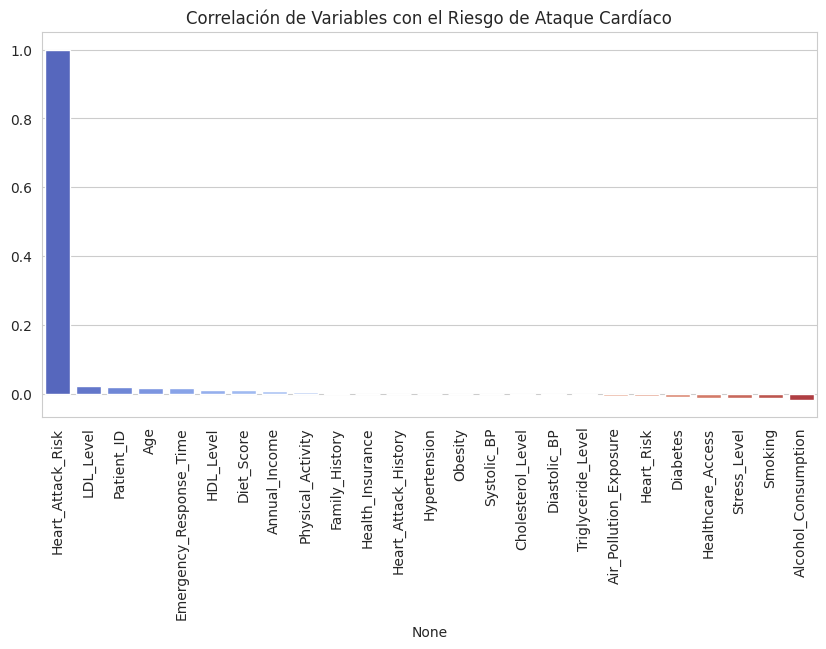

In [ ]:
# Verificar si la variable `output_folder` está definida
if 'output_folder' not in globals():
    output_folder = "imagenes"
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta si no existe

# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Riesgo de ataque cardíaco.png")
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Rellenar valores nulos con la media de cada columna
df_numeric = df_numeric.fillna(df_numeric.mean())

# Calcular correlaciones con el riesgo de ataque cardíaco
correlaciones = df_numeric.corr()['Heart_Attack_Risk'].sort_values(ascending=False)

# Visualizar correlaciones más altas
plt.figure(figsize=(10, 5))
sns.barplot(x=correlaciones.index, y=correlaciones.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Correlación de Variables con el Riesgo de Ataque Cardíaco")

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

#Mostar imagen
plt.show()

**Comparar porcentajes de ataques cardíacos en hombres y mujeres: Identifica si los hombres tienen más riesgo de ataque cardíaco que las mujeres.**

,Género,Probabilidad de Ataque Cardíaco (%)
0,Female,29.66%
1,Male,30.40%


<ipython-input-48-67786267038a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_heart_attack.index, y=gender_heart_attack.values, palette="pastel")


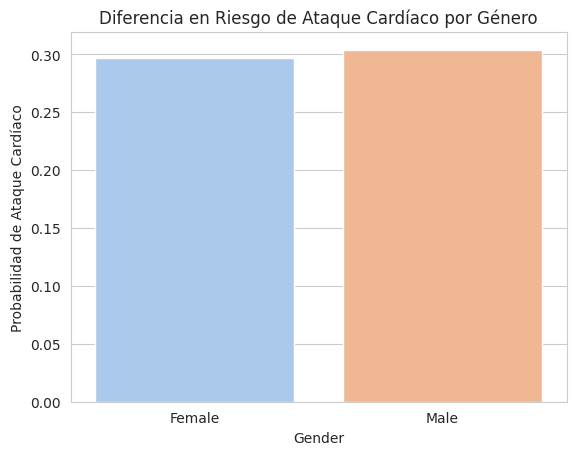

In [ ]:
# Verificar si la variable `output_folder` está definida
if 'output_folder' not in globals():
    output_folder = "imagenes"
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta si no existe

# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Ataque cardíaco por genero.png")

# Comparación de ataques cardíacos por género
gender_heart_attack = df.groupby('Gender')['Heart_Attack_Risk'].mean()

# Mostrar resultados: Transformar a DataFrame y formatear como porcentaje
gender_heart_attack_df = gender_heart_attack.reset_index()
gender_heart_attack_df.columns = ['Género', 'Probabilidad de Ataque Cardíaco (%)']
gender_heart_attack_df['Probabilidad de Ataque Cardíaco (%)'] *= 100

# Mostrar como tabla
display(gender_heart_attack_df.style
        .set_caption("Porcentaje de Ataques Cardíacos por Género")
        .format({'Probabilidad de Ataque Cardíaco (%)': "{:.2f}%"})
        .set_properties(**{
            'border': '1px solid #ccc',
            'padding': '8px',
            'text-align': 'center'
        }))


# Graficar la diferencia
sns.barplot(x=gender_heart_attack.index, y=gender_heart_attack.values, palette="pastel")
plt.title("Diferencia en Riesgo de Ataque Cardíaco por Género")
plt.ylabel("Probabilidad de Ataque Cardíaco")

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

#Mostar imagen
plt.show()


**Relación entre el estilo de vida y el riesgo cardíaco: Cómo afectan el tabaquismo.**

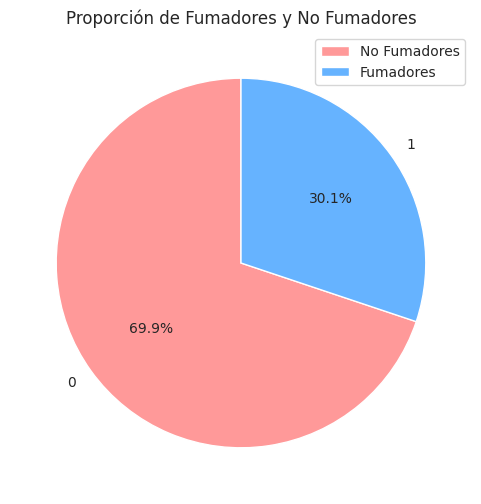

In [ ]:
# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Proporción de Fumadores y No Fumadores.png")

# Contar la cantidad de fumadores y no fumadores
data_pie = df['Smoking'].value_counts()

# Crear gráfico de torta con leyenda
plt.figure(figsize=(6, 6))
colors = ['#ff9999', '#66b3ff']  # Definir colores
patches, texts, autotexts = plt.pie(data_pie, labels=data_pie.index, autopct='%1.1f%%',
                                    colors=colors, startangle=90)

# Leyenda
plt.legend(patches, ['No Fumadores', 'Fumadores'], loc="best")

# Título del gráfico
plt.title("Proporción de Fumadores y No Fumadores")

# Guardar la imagen
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


**Impacto de la presión arterial en el riesgo de ataque cardíaco: Determina si una presión arterial alta es un predictor fuerte de ataques cardíacos.**

<ipython-input-50-38539be02eb8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Heart_Attack_Risk", y="Systolic_BP", data=df, palette="magma")


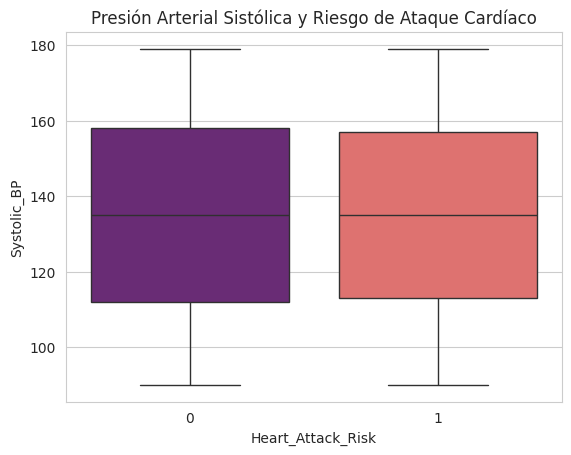

In [ ]:
# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Presiòn arterial y Riesgo de Ataque Cardíaco.png")

sns.boxplot(x="Heart_Attack_Risk", y="Systolic_BP", data=df, palette="magma")
plt.title("Presión Arterial Sistólica y Riesgo de Ataque Cardíaco")

# Guardar la imagen en la carpeta
plt.savefig(image_path, dpi=300, bbox_inches='tight')
plt.show()

**Tabla del nivel promedio de colesterol para diferentes grupos de edad**

In [ ]:
# Promedio de colesterol por categoría de edad
cholesterol_by_age = df.groupby('Age_Category')['Cholesterol_Level'].mean().reset_index()

# Mostrar en formato de tabla
print("\nPromedio de colesterol por categoría de edad:")
display(cholesterol_by_age)


Promedio de colesterol por categoría de edad:


<ipython-input-51-19863b11cb68>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cholesterol_by_age = df.groupby('Age_Category')['Cholesterol_Level'].mean().reset_index()


,Age_Category,Cholesterol_Level
0,18-30,224.905216
1,31-45,226.550285
2,46-60,223.930538
3,61-75,224.123327
4,76-90,222.627193


# ENCODING Y SELECCIÓN DE VARIABLES

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:54:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


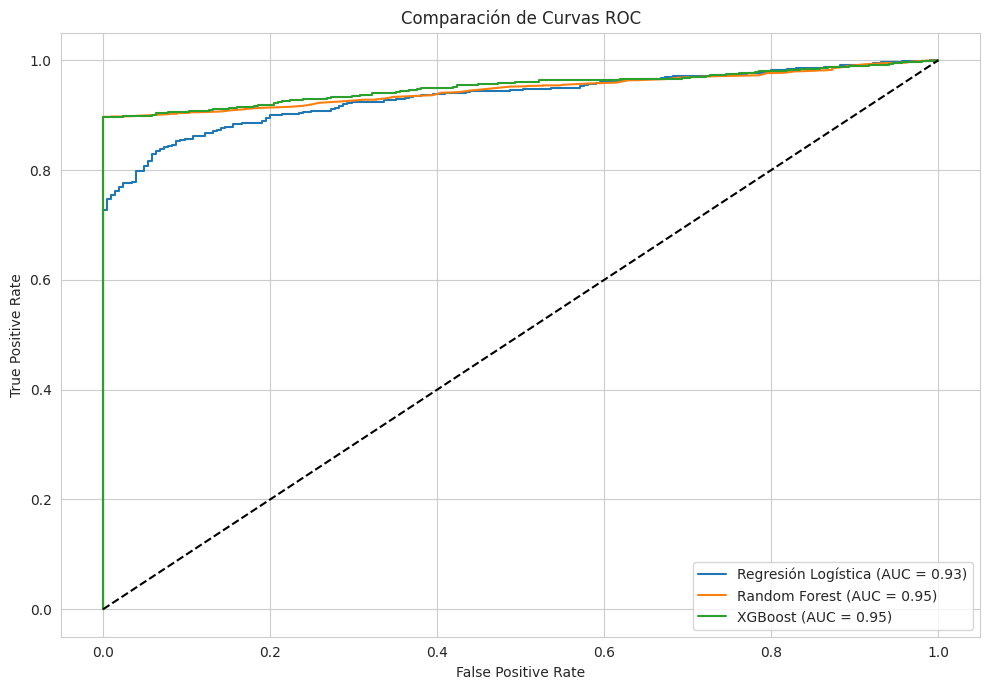

In [ ]:
# Selección de variables
X = df[['Age', 'Systolic_BP', 'Cholesterol_Level']]
y = df['Heart_Risk']
X_encoded = pd.get_dummies(X, drop_first=True)

# División de datos y prueba

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)


# Entrenamiento de modelos:
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []
plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    results.append({
        "Modelo": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": auc_roc
    })

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_roc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("Comparación de Curvas ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Tabla Comparativa de Modelos: Comparación de Modelos de Clasificación**

In [ ]:
results_df = pd.DataFrame(results)

# Ordenar por ROC AUC descendente
results_df = results_df.sort_values("ROC AUC", ascending=False)

# Mostrar la tabla
display(results_df.style.set_caption("Comparación de Modelos de Clasificación")
        .format({"Accuracy": "{:.2%}", "Precision": "{:.2%}", "Recall": "{:.2%}", "F1 Score": "{:.2%}", "ROC AUC": "{:.2%}"})
        .set_table_styles([{
            'selector': 'caption',
            'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]
        }])
        .set_properties(**{
            'border': '1px solid black',
            'padding': '6px',
            'text-align': 'center'
        })
)

# Guardado del modelo final
best_model = models["XGBoost"]
joblib.dump(best_model, "modelo_xgboost.pkl")


,Modelo,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,XGBoost,91.40%,95.62%,94.76%,95.19%,95.21%
1,Random Forest,90.45%,95.16%,94.15%,94.65%,94.76%
0,Regresión Logística,90.35%,92.61%,96.99%,94.75%,93.34%


['modelo_xgboost.pkl']

 **Entrenamiento y evaluación de modelos**: Comparamos:

* **Regresión Logística**
* **Random Forest**
* **XGBoost**
Con métricas clave: **accuracy**, **precision**, **recall**, **F1-score**, **ROC AUC** y **curva ROC**.

## **Predicción del nuevo paciente:**

In [ ]:
#Nueva Predicción
nuevo_paciente = pd.DataFrame([{
    'Age': 55,
    'Systolic_BP': 145,
    'Cholesterol_Level': 230
}])
nuevo_encoded = pd.get_dummies(nuevo_paciente)
nuevo_encoded = nuevo_encoded.reindex(columns=X_train.columns, fill_value=0)
#elijo el modelo XGBoost
pred = best_model.predict(nuevo_encoded)
prob = best_model.predict_proba(nuevo_encoded)[:, 1]

print("\nPredicción de riesgo cardíaco:", "Sí" if pred[0] == 1 else "No")
print("Probabilidad: {:.2f}%".format(prob[0]*100))


Predicción de riesgo cardíaco: Sí
Probabilidad: 99.99%


# **Importancia de las variables**

<ipython-input-55-ae6604aecdc4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=rf_df.sort_values(by="Importance", ascending=False).head(10), palette="crest")


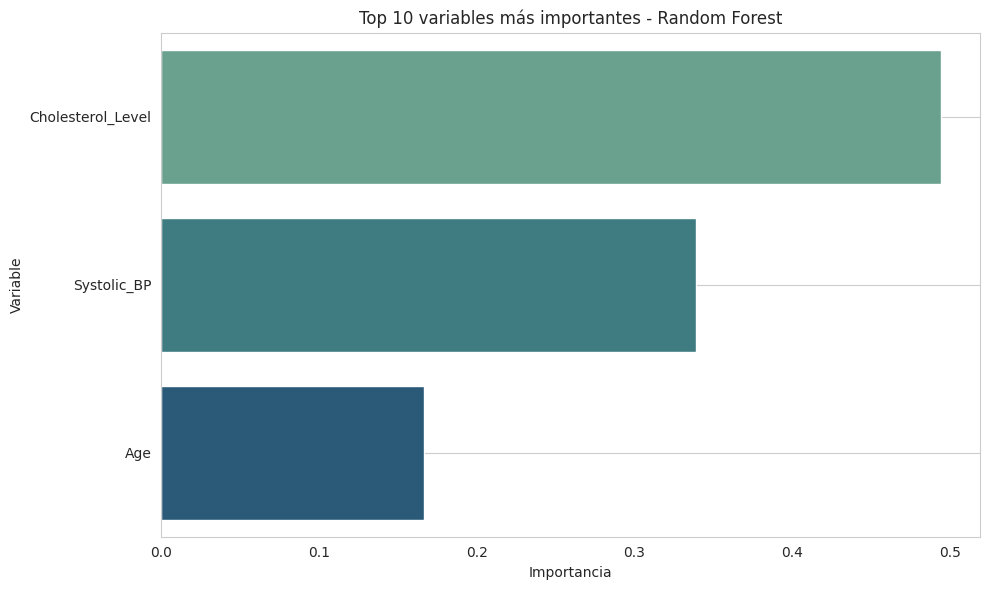

<ipython-input-55-ae6604aecdc4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=xgb_df.sort_values(by="Importance", ascending=False).head(10), palette="flare")


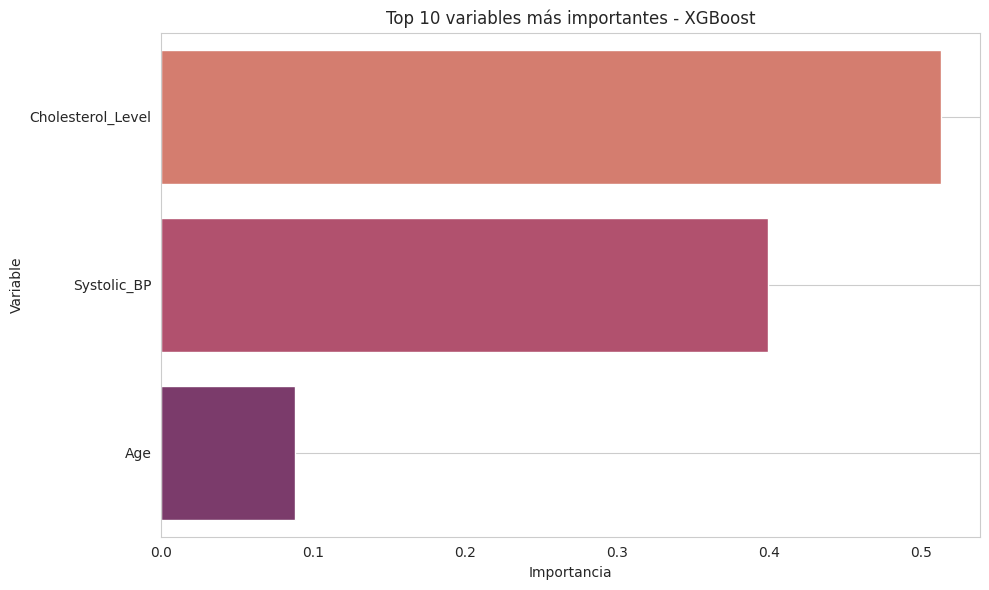

In [ ]:
# 10 variables más importantes para Random Forest
importances_rf = models["Random Forest"].feature_importances_
rf_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances_rf})

# 10 variables más importantes para XGBoost
importances_xgb = models["XGBoost"].feature_importances_
xgb_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances_xgb})

# Gráfico - Random Forest
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=rf_df.sort_values(by="Importance", ascending=False).head(10), palette="crest")
plt.title("Top 10 variables más importantes - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.grid()
plt.tight_layout()
plt.show()

# Gráfico - XGBoost
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=xgb_df.sort_values(by="Importance", ascending=False).head(10), palette="flare")
plt.title("Top 10 variables más importantes - XGBoost")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.grid()
plt.tight_layout()
plt.show()

#  **Conclusiones Finales:**
- XGBoost fue el modelo con mejor rendimiento (mayor AUC y F1).
- Las variables más relevantes fueron Systolic_BP y Cholesterol_Level.
- El modelo puede utilizarse como apoyo clínico para evaluar el riesgo cardiovascular de un paciente.